In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from  sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('clean_automobile_data.csv')

In [4]:
lm = LinearRegression()
x = df[['highway-mpg']]
y = df['price']
lm.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [12]:
print(lm.intercept_)
print(lm.coef_)

38536.64155616533
[-820.88222066]


In [13]:
y_pred = lm.predict(x)

In [14]:
print("R2 Score:", r2_score(y, y_pred))

R2 Score: 0.4927007412689096


In [53]:
print(f'the price of the car having 30 highway_mpg {lm.predict(np.array(30).reshape(-1,1))}')

the price of the car having 30 highway_mpg [13910.17493649]


c:\Users\mugun\Miniconda3\envs\dataenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [54]:
y_pred_input = np.arange(1,101,1).reshape(-1,1)
y_pred_num = lm.predict(y_pred_input)
y_pred_num

c:\Users\mugun\Miniconda3\envs\dataenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 37715.75933551,  36894.87711485,  36073.9948942 ,  35253.11267354,
        34432.23045289,  33611.34823223,  32790.46601158,  31969.58379092,
        31148.70157026,  30327.81934961,  29506.93712895,  28686.0549083 ,
        27865.17268764,  27044.29046698,  26223.40824633,  25402.52602567,
        24581.64380502,  23760.76158436,  22939.87936371,  22118.99714305,
        21298.11492239,  20477.23270174,  19656.35048108,  18835.46826043,
        18014.58603977,  17193.70381912,  16372.82159846,  15551.9393778 ,
        14731.05715715,  13910.17493649,  13089.29271584,  12268.41049518,
        11447.52827453,  10626.64605387,   9805.76383321,   8984.88161256,
         8163.9993919 ,   7343.11717125,   6522.23495059,   5701.35272994,
         4880.47050928,   4059.58828862,   3238.70606797,   2417.82384731,
         1596.94162666,    776.059406  ,    -44.82281466,   -865.70503531,
        -1686.58725597,  -2507.46947662,  -3328.35169728,  -4149.23391793,
        -4970.11613859,  

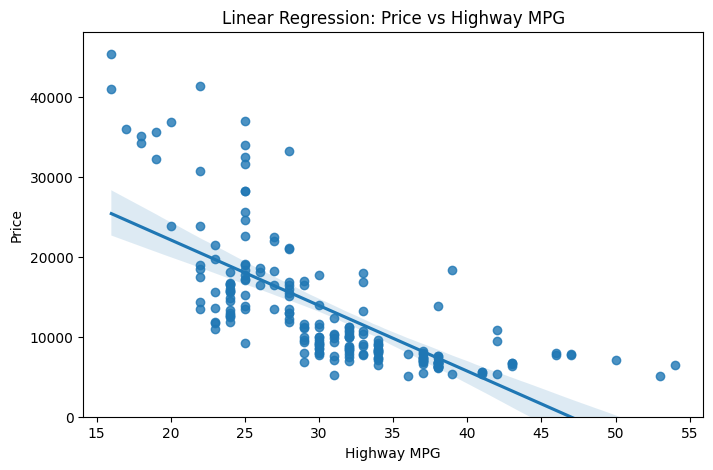

In [29]:
plt.figure(figsize=(8,5))
sns.regplot(x = df['highway-mpg'], y = df['price'])
plt.ylim(0,)
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs Highway MPG')
plt.savefig('charts/Model_ypedict_linear_highway_price.png', dpi = 300, bbox_inches = 'tight')
plt.show()

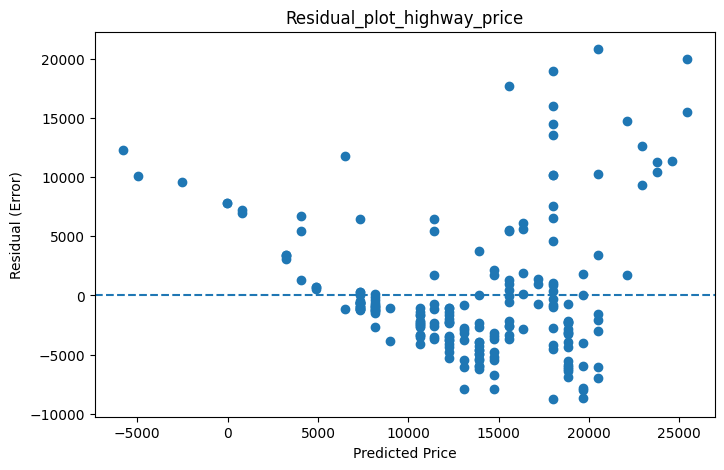

In [41]:
residuals = y - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, linestyle='--')  # Zero error line
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Error)")
plt.title("Residual_plot_highway_price")
plt.savefig('charts/Model_residual_linear_highway_price.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [16]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'price-category'],
      dtype='object')

In [ ]:
# multiple linear regression


ml_x = df[['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']]
mlm = LinearRegression()
mlm.fit(ml_x, y) # y = df['price']
print(f'intercept = {mlm.intercept_}')
print(f'slope of relation  = {mlm.coef_}')
ml_y_pred = mlm.predict(ml_x)
print(f'r2 socore = {r2_score(y, ml_y_pred)}')

intercept = -16347.227826168124
slope of relation  = [77.90188678 57.43372262  4.849876   44.79855949]
r2 socore = 0.8164366664452698


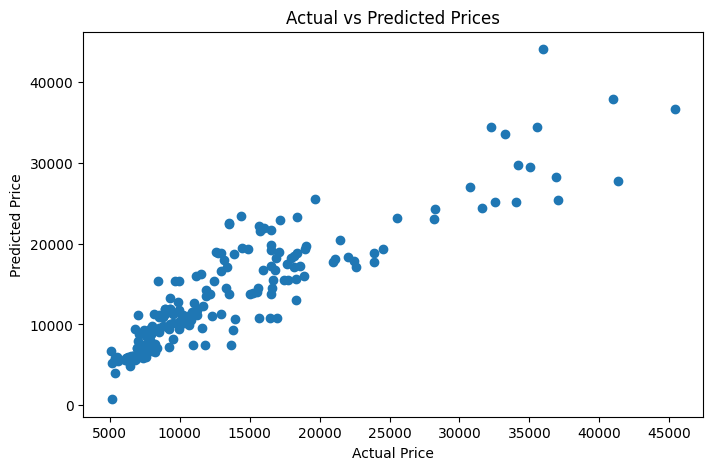

In [57]:


plt.figure(figsize=(8,5))
plt.scatter(y, ml_y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()


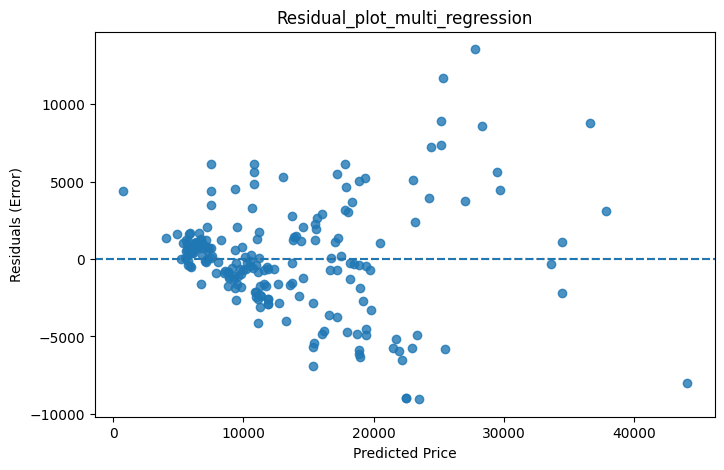

In [42]:


residuals = y - ml_y_pred   # residual = actual - predicted

plt.figure(figsize=(8,5))
sns.residplot(x=ml_y_pred, y=residuals)
plt.axhline(y=0, linestyle='--')  # zero error line
plt.xlabel("Predicted Price")
plt.ylabel("Residuals (Error)")
plt.title("Residual_plot_multi_regression")
plt.savefig('charts/Model_redisual_multi_liner_regression.png', dpi = 300, bbox_inches = 'tight')
plt.show()


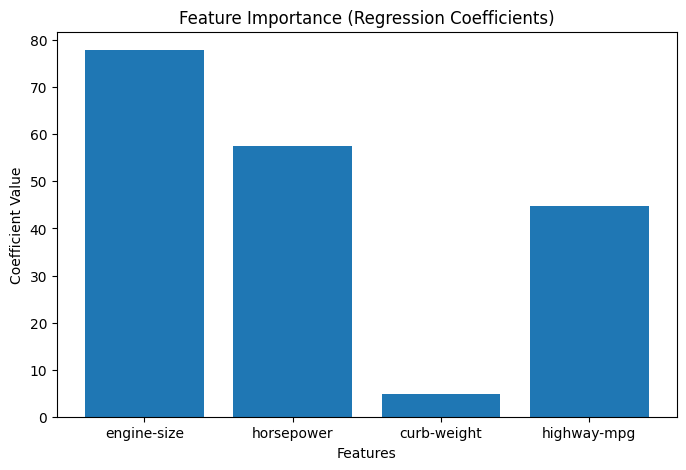

In [43]:
coef_df = pd.DataFrame({
    'Feature' : ml_x.columns,
    'Coefficient' : mlm.coef_
})

plt.figure(figsize=(8,5))
plt.bar(coef_df['Feature'], coef_df['Coefficient'])
plt.title("Feature Importance (Regression Coefficients)")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.savefig('charts/Model_slop_of_features.png', dpi = 300, bbox_inches = 'tight')
plt.show()


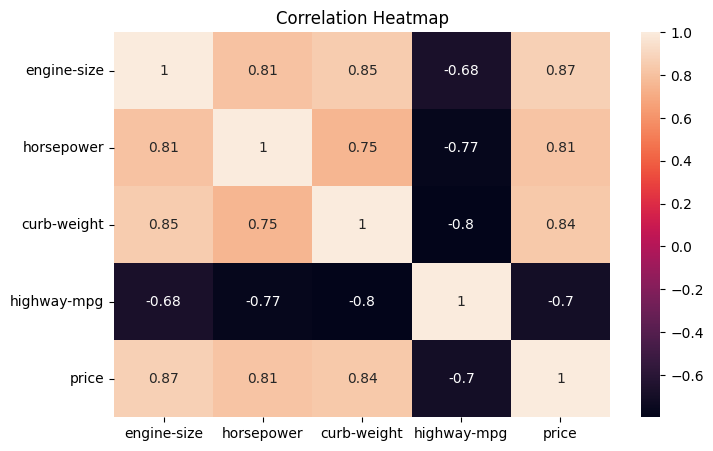

In [44]:
plt.figure(figsize=(8,5))
sns.heatmap(df[['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'price']].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()


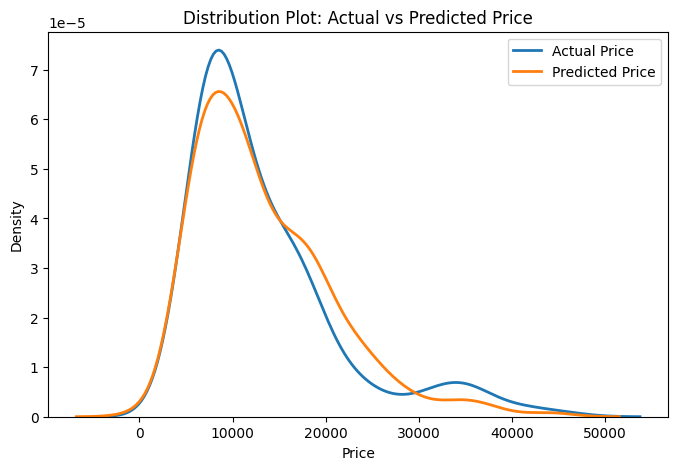

In [47]:
# distribution plot

plt.figure(figsize=(8,5))

sns.kdeplot(df['price'], label="Actual Price", linewidth=2)
sns.kdeplot(ml_y_pred, label="Predicted Price", linewidth=2)

plt.title("Distribution Plot: Actual vs Predicted Price")
plt.xlabel("Price")
plt.ylabel("Density")
plt.legend()
plt.savefig('charts/Model_distribution_actual_predicted.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [50]:
# polynomial regression

x = df['highway-mpg']
y = df['price']

f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3       2
-1.457 x + 194 x - 8601 x + 1.342e+05


In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Select the columns
X = df[['horsepower', 'highway-mpg']]
y = df['price']

# 1. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Create Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# Now you can train regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
y_pred = model.predict(X_poly)


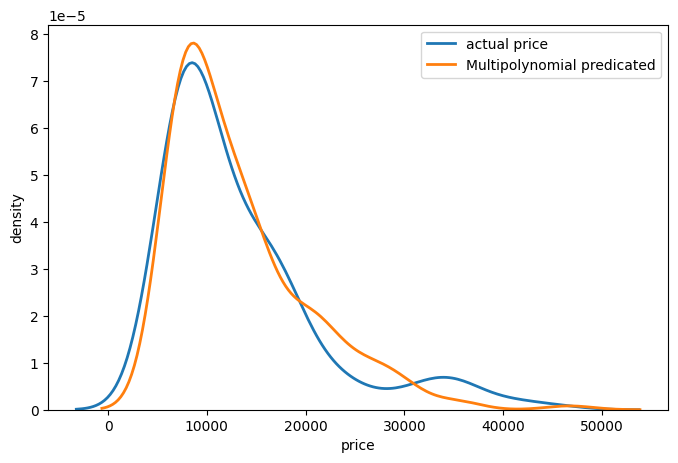

In [7]:
plt.figure(figsize= (8,5))
sns.kdeplot(df['price'], label = 'actual price', linewidth = 2)
sns.kdeplot(y_pred,label='Multipolynomial predicated', linewidth = 2)
plt.legend()
plt.xlabel('price')
plt.ylabel('density')
plt.savefig('charts/model_actual_predicted_multi_poly_regression.png', dpi = 300, bbox_inches = 'tight')
plt.show() 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV

X = df[['horsepower','curb-weight','engine-size','highway-mpg']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(include_bias=False)),
    ('model', Ridge())
])

param_grid = {'poly__degree': [1,2,3], 'model__alpha': [0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)   

print("Best params:", grid.best_params_)
print("Test R2:", grid.score(X_test, y_test))


Best params: {'model__alpha': 10, 'poly__degree': 1}
Test R2: 0.8112117197071564


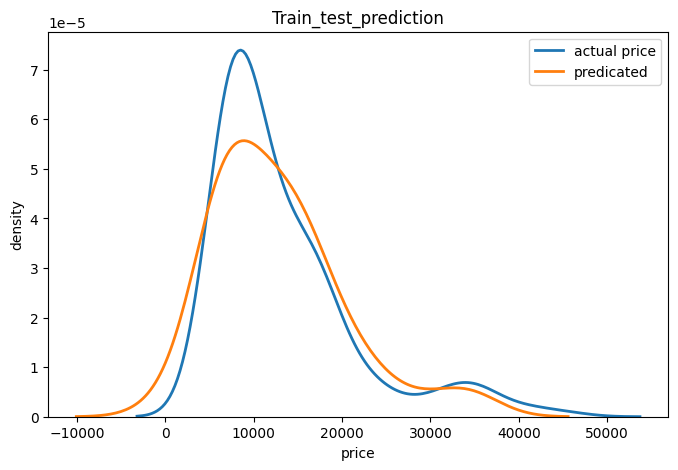

In [10]:
plt.figure(figsize= (8,5))
sns.kdeplot(df['price'], label = 'actual price', linewidth = 2)
sns.kdeplot(y_pred,label='predicated', linewidth = 2)
plt.legend()
plt.xlabel('price')
plt.ylabel('density')
plt.title('Train_test_prediction')
plt.savefig('charts/model_Train_test_prediction_multi_poly_regression.png', dpi = 300, bbox_inches = 'tight')
plt.show() 

In [11]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
import numpy as np

# 1. Features & Target
X = df[['horsepower','curb-weight','engine-size','highway-mpg']]
y = df['price']

# 2. Define Model (Here: Ridge Regression)
model = Ridge()

# 3. Pipeline (Scaling + Polynomial + Ridge)
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', Ridge())
])

# 4. CROSS VALIDATION PREDICTION
yhat = cross_val_predict(pipe, X, y, cv=3)

# 5. CROSS VALIDATION SCORE
scores = cross_val_score(pipe, X, y, cv=3, scoring='r2')
print("Cross Validation Scores:", scores)
print("Mean R2 Score:", np.mean(scores))


Cross Validation Scores: [0.74060794 0.61226725 0.66448135]
Mean R2 Score: 0.6724521817599217


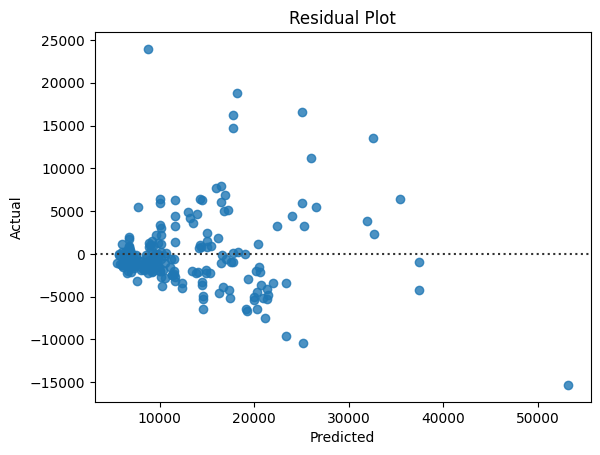

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.residplot(x=yhat, y=y)  # predicted vs actual
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Residual Plot")
plt.show()

